# Visualização de Dados

In [1]:
#Import libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
#Import data
data = pd.read_csv('State of Data 2021 - Dataset - Pgina1 (1).csv')

In [3]:
data.head()

,Unnamed: 0,Idade,Genero,UF,Regiao_origem,Nivel Ensino,Area Formacao,Situacao Trabalho,Setor,Trabalha como Gestao,...,Cargo Atual,Nivel,Faixa Salarial,Insatisfacao com a Empresa,Tempo XP em Dados,Tempo XP em Software,Criterios de escolha trabalho,Forma de trabalho atual,Forma de trabalho desejada,Faixa Salarial_number
0,0,38.0,Masculino,CE,NaN,Pós-graduação,Química / Física,Empregado (CLT),Marketing,1.0,...,NaN,Gestor,de R$ 4.001/mês a R$ 6.000/mês,NaN,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,6000.0
1,1,39.0,Masculino,BA,Sudeste,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),Consultoria,1.0,...,NaN,Gestor,de R$ 6.001/mês a R$ 8.000/mês,NaN,de 2 a 3 anos,Não tive experiência na área de TI/Engenharia ...,Flexibilidade de trabalho remoto,Modelo híbrido flexível (o funcionário tem lib...,Modelo 100% remoto,8000.0
2,2,30.0,Masculino,SC,NaN,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Indústria,1.0,...,NaN,Gestor,de R$ 8.001/mês a R$ 12.000/mês,O clima de trabalho/ambiente não é bom,de 1 a 2 anos,de 2 a 3 anos,Oportunidade de aprendizado e trabalhar com re...,Modelo 100% presencial,Modelo 100% remoto,12000.0
3,3,38.0,Feminino,SP,NaN,Pós-graduação,Outras,Empreendedor ou Empregado (CNPJ),Serviços,1.0,...,NaN,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Falta de maturidade analítica na empresa,Mais de 10 anos,Menos de 1 ano,"Propósito do trabalho e da empresa, Flexibilid...",Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,16000.0
4,4,36.0,Masculino,SC,NaN,Pós-graduação,Outras Engenharias,Empreendedor ou Empregado (CNPJ),Varejo,1.0,...,NaN,Gestor,de R$ 8.001/mês a R$ 12.000/mês,Gostaria de trabalhar em em outra área de atua...,de 1 a 2 anos,de 4 a 5 anos,Maturidade da empresa em termos de tecnologia ...,Modelo 100% presencial,Modelo 100% remoto,12000.0


In [4]:
len(data)

2365

In [5]:
data.shape

(2365, 21)

# Visualization Definition

#### Question to answer: Why women earn less than men?

##### Men and Women distribution

In [6]:
data['Genero'].value_counts()

Masculino    1924
Feminino      436
Outro           5
Name: Genero, dtype: int64

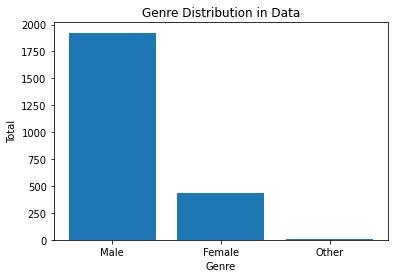

In [7]:
#Replace column values
data['Genero'] = data['Genero'].replace(['Masculino','Feminino','Outro'],['Male','Female','Other'])

#Bar chart with matplotlib
plt.bar(data['Genero'].unique(),data['Genero'].value_counts())
plt.title('Genre Distribution in Data')
plt.xlabel('Genre')
plt.ylabel('Total');

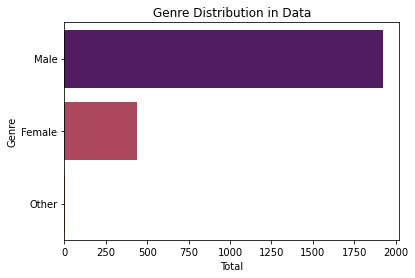

In [8]:
#Same chart with seaborn

ax = sns.countplot(y='Genero',data=data,palette='inferno',order=data['Genero'].value_counts().index)
ax.set_title('Genre Distribution in Data')
ax.set_xlabel('Total')
ax.set_ylabel('Genre')
ax; 

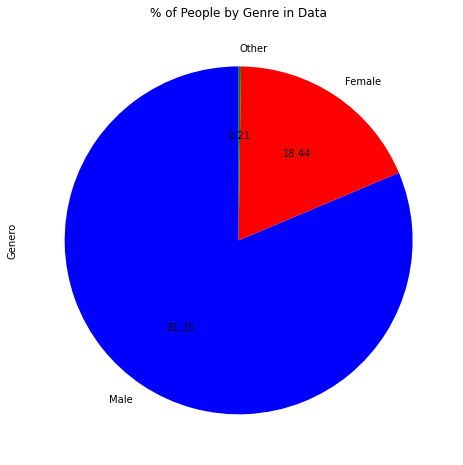

In [9]:
#Pie chart
tmp = pd.DataFrame(data['Genero'].value_counts())
tmp.plot.pie(y='Genero',figsize=(8,8),autopct='%.2f',title='% of People by Genre in Data',
             startangle=90,legend=False,ylabel=None,colors=['blue','red','green']
             );

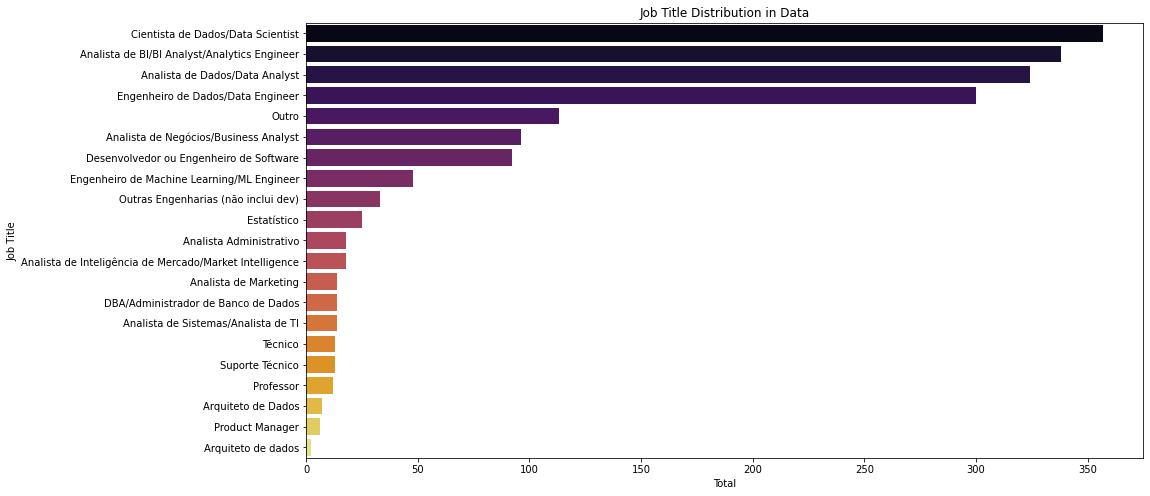

In [10]:
#Job Title distribution
plt.figure(figsize=(15,8))
ax = sns.countplot(y='Cargo Atual',data=data,palette='inferno',order=data['Cargo Atual'].value_counts().index)
ax.set_title('Job Title Distribution in Data')
ax.set_xlabel('Total')
ax.set_ylabel('Job Title')
ax; 

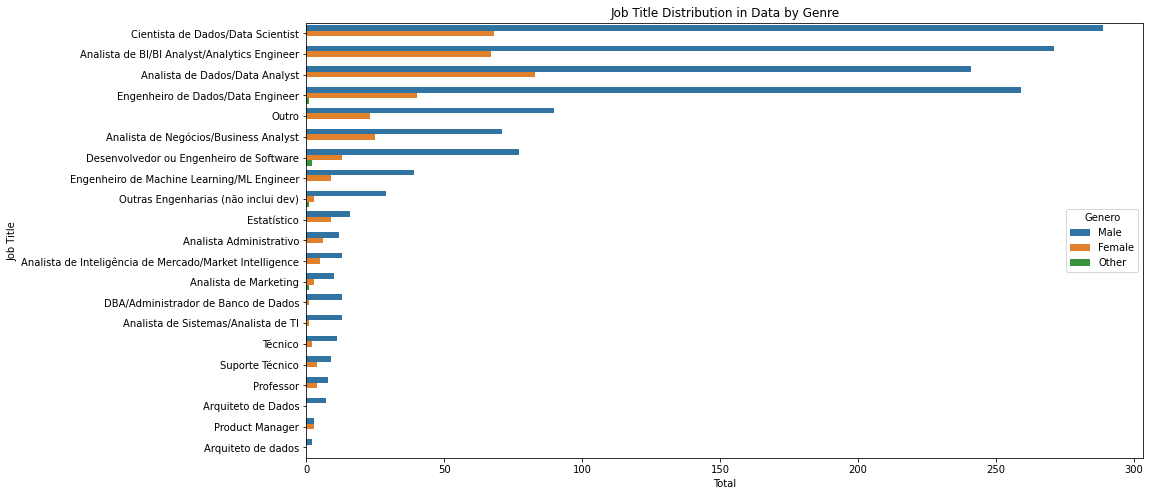

In [11]:
#Job Title distribution
plt.figure(figsize=(15,8))
ax = sns.countplot(y='Cargo Atual',data=data,hue='Genero',order=data['Cargo Atual'].value_counts().index)
ax.set_title('Job Title Distribution in Data by Genre')
ax.set_xlabel('Total')
ax.set_ylabel('Job Title')
ax; 

### Level Distribution by Genre

In [12]:
data['Nivel'] = data['Nivel'].replace(['Júnior','Pleno','Sênior','Gestor'],['Junior','Mid','Senior','Manager'])
data.rename(columns={'Genero':'Genre','Nivel':'Level'},inplace=True)

tmp = data.groupby('Genre')['Level'].value_counts()

In [13]:
tmp.head()

Genre   Level  
Female  Junior     144
        Mid        131
        Senior      94
        Manager     67
Male    Mid        525
Name: Level, dtype: int64

In [14]:
tmp = tmp.reset_index(name='Total')

In [15]:
tmp.head()

,Genre,Level,Total
0,Female,Junior,144
1,Female,Mid,131
2,Female,Senior,94
3,Female,Manager,67
4,Male,Mid,525


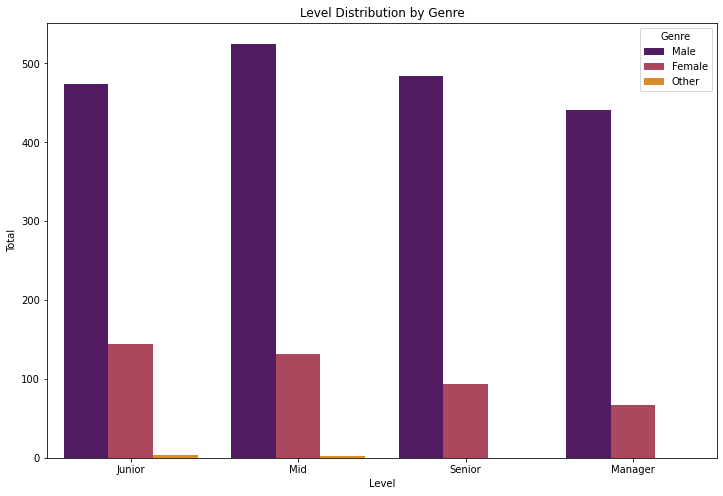

In [16]:
plt.figure(figsize=(12,8))
sns.barplot(x='Level',y='Total',hue='Genre',palette='inferno',data=tmp,hue_order=['Male','Female','Other'])
plt.title('Level Distribution by Genre')
plt.xlabel('Level')
plt.ylabel('Total')
plt;

# Compensation

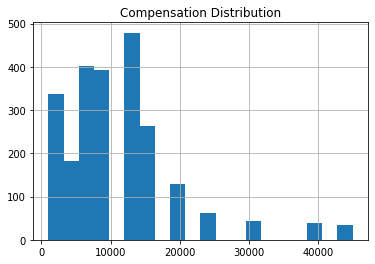

In [17]:
data['Faixa Salarial_number'].hist(bins=20)
plt.title('Compensation Distribution')
plt;

### Compensation x Genre


In [18]:
data2 = data[data['Cargo Atual'].str.contains('Cientista de Dados',na=False)]

In [19]:
tmp = data2.groupby(['Genre','Level'])['Faixa Salarial_number'].mean().round(2)
tmp.head()

Genre   Level 
Female  Junior     5615.38
        Mid        9600.00
        Senior    13882.35
Male    Junior     5247.19
        Mid       10896.83
Name: Faixa Salarial_number, dtype: float64

In [20]:
tmp=tmp.reset_index(name='Mean Compensation')
tmp.head()

,Genre,Level,Mean Compensation
0,Female,Junior,5615.38
1,Female,Mid,9600.00
2,Female,Senior,13882.35
3,Male,Junior,5247.19
4,Male,Mid,10896.83


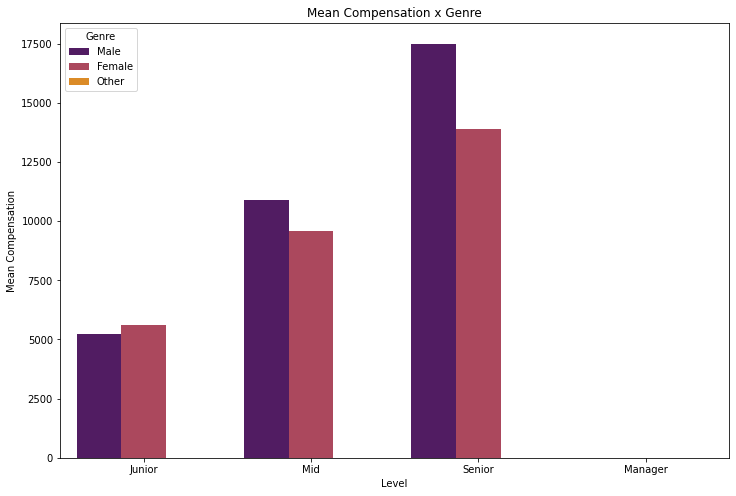

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x='Level',y='Mean Compensation',hue='Genre',data=tmp,order=['Junior','Mid','Senior','Manager'],palette='inferno',hue_order=['Male','Female','Other'])
plt.title('Mean Compensation x Genre')
plt.xlabel('Level')
plt.ylabel('Mean Compensation')
plt;

In [22]:
data['Tempo XP em Dados'].unique()

array(['Mais de 10 anos', 'de 2 a 3 anos', 'de 1 a 2 anos',
       'de 4 a 5 anos', 'Não tenho experiência na área de dados',
       'Menos de 1 ano', 'de 6 a 10 anos'], dtype=object)

In [23]:
data2['Tempo XP em Dados'] = data['Tempo XP em Dados'].replace(['Mais de 10 anos', 'de 2 a 3 anos', 'de 1 a 2 anos',
       'de 4 a 5 anos', 'Não tenho experiência na área de dados','Menos de 1 ano', 'de 6 a 10 anos'],                                                   
                                                              ['More than 10 years', '2 to 3 years', '1 to 2 years',
        'from 4 to 5 years', 'I have no experience in the data area',
        'Less than 1 year', 'from 6 to 10 years'])

data2.rename(columns={'Tempo XP em Dados':'Time Experience with Data'},inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


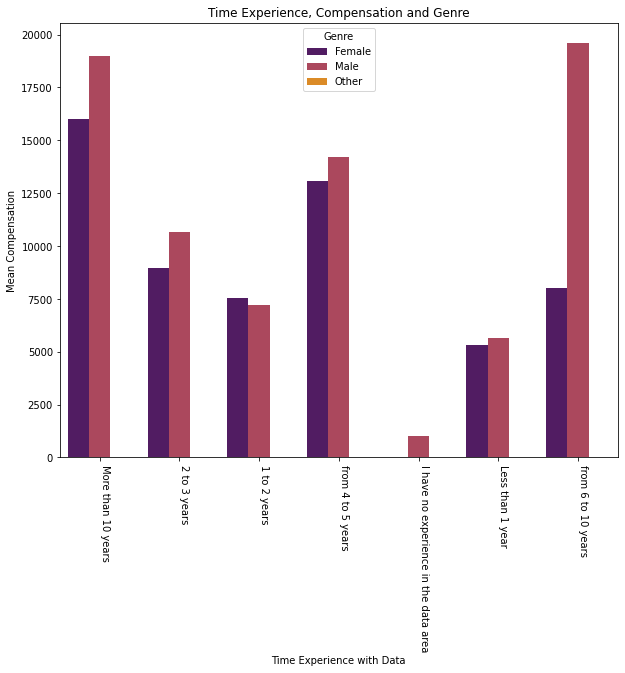

In [24]:
tmp = data2.groupby(['Genre','Time Experience with Data'])['Faixa Salarial_number'].mean()
tmp = tmp.reset_index(name='Mean Compensation')
plt.figure(figsize=(10,8))

ax = sns.barplot(x='Time Experience with Data',y='Mean Compensation',hue='Genre',data=tmp,
            order= ['More than 10 years', '2 to 3 years', '1 to 2 years','from 4 to 5 years', 'I have no experience in the data area',
                    'Less than 1 year', 'from 6 to 10 years'],hue_order=['Female', 'Male','Other'],
            palette='inferno')

plt.title('Time Experience, Compensation and Genre')
ax.set_xticklabels(labels=['More than 10 years', '2 to 3 years', '1 to 2 years','from 4 to 5 years', 'I have no experience in the data area',
                    'Less than 1 year', 'from 6 to 10 years'],rotation=(270),fontsize=10,va='top',ha='left')
ax;